In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import random
import time
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)
X, Y = make_moons(500, noise=0.1)

# Split into test and training data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=73)
y_train = np.reshape(y_train, (y_train.shape[0], 1))

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [28]:
np.shape(x_train)

(375, 2)

In [9]:
# Standard BP
model_bp = keras.Sequential(
    [
        keras.Input(shape=(2,)),
        #layers.Dense(50, activation = "sigmoid"),
        layers.Dense(50, activation = "sigmoid"),
        layers.Dense(1, activation = "sigmoid")
    ]
)
model_bp.summary()
#model_bp.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [10]:
import time
batch_size = 32
epochs = 1000
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

st = time.time()
model_bp.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model_bp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
print(time.time() - st)

Epoch 1/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5947
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.6463 - accuracy: 0.7653
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.7627
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.8053
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.8160
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7973
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.8053
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.7893
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7920
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.8027

12/12 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8853
Epoch 83/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.8853
Epoch 84/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2578 - accuracy: 0.8827
Epoch 85/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.8853
Epoch 86/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8853
Epoch 87/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.8853
Epoch 88/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.8853
Epoch 89/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.8853
Epoch 90/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.8853
Epoch 91/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2538 - accuracy: 0.8853
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.8800
Epoch 163/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8853
Epoch 164/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8853
Epoch 165/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8827
Epoch 166/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8827
Epoch 167/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8827
Epoch 168/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8800
Epoch 169/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.8747
Epoch 170/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.8800
Epoch 171/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.8800
Epoch 243/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8880
Epoch 244/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8747
Epoch 245/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8827
Epoch 246/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8853
Epoch 247/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.8800
Epoch 248/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8773
Epoch 249/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8853
Epoch 250/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.8800
Epoch 251/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8747
Epoch 323/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8800
Epoch 324/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8853
Epoch 325/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8827
Epoch 326/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.8827
Epoch 327/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8827
Epoch 328/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8800
Epoch 329/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8800
Epoch 330/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8827
Epoch 331/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8800
Epoch 403/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8773
Epoch 404/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8827
Epoch 405/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8853
Epoch 406/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8800
Epoch 407/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8853
Epoch 408/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.8853
Epoch 409/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.8827
Epoch 410/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.8907
Epoch 411/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8827
Epoch 483/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8827
Epoch 484/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8827
Epoch 485/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8800
Epoch 486/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8800
Epoch 487/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8800
Epoch 488/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8800
Epoch 489/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8827
Epoch 490/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8800
Epoch 491/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8800
Epoch 563/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8827
Epoch 564/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8827
Epoch 565/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8853
Epoch 566/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8853
Epoch 567/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8800
Epoch 568/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8827
Epoch 569/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8800
Epoch 570/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8827
Epoch 571/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8800
Epoch 643/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8827
Epoch 644/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8827
Epoch 645/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8800
Epoch 646/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8827
Epoch 647/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8800
Epoch 648/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8800
Epoch 649/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8827
Epoch 650/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8800
Epoch 651/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8800
Epoch 723/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8853
Epoch 724/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8853
Epoch 725/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.8827
Epoch 726/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8880
Epoch 727/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8827
Epoch 728/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8853
Epoch 729/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8880
Epoch 730/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8827
Epoch 731/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.8907
Epoch 803/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.8853
Epoch 804/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8853
Epoch 805/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.8880
Epoch 806/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8880
Epoch 807/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8907
Epoch 808/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8907
Epoch 809/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8907
Epoch 810/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.8853
Epoch 811/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.8907
Epoch 883/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.8853
Epoch 884/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.8907
Epoch 885/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8907
Epoch 886/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8907
Epoch 887/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.8853
Epoch 888/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8853
Epoch 889/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8933
Epoch 890/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8880
Epoch 891/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.8987
Epoch 963/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9040
Epoch 964/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9013
Epoch 965/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9013
Epoch 966/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.8987
Epoch 967/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.8987
Epoch 968/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9067
Epoch 969/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9013
Epoch 970/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9040
Epoch 971/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.

In [12]:
#hmc

def convert2_zero_one(x):
    
    t = [tf.math.sigmoid(i) for i in x]
    
    return t

In [13]:
def rerange(x, r = 6.0):
    
    out_of_range = tf.cast(tf.math.greater(tf.math.abs(x), r), tf.float32)
    sign = tf.math.sign(x)
    
    return x * (1 - out_of_range) + sign * r * out_of_range

In [47]:
# MLP model
class StochasticMLP(Model):
    
    def __init__(self, hidden_layer_sizes=[100], n_outputs=10):
        super(StochasticMLP, self).__init__()
        self.hidden_layer_sizes = hidden_layer_sizes
        self.fc_layers = [Dense(layer_size) for layer_size in hidden_layer_sizes]
        self.output_layer = Dense(n_outputs)
    
    def call(self, x):
        
        #x = Flatten()(x)
        
        network = []
        
        for i, layer in enumerate(self.fc_layers):
            
            logits = layer(x)
            x = tfp.distributions.Bernoulli(logits=logits).sample()
            network.append(x)

        final_logits = self.output_layer(x) # initial the weight of output layer
            
        return network
    
    def target_log_prob(self, x, h, y):
        
        h_current = convert2_zero_one([tf.cast(h_i, dtype=tf.float32) for h_i in h])
        h_previous = [x] + h_current[:-1]
    
        nlog_prob = 0. # negative log probability
        
        for i, (cv, pv, layer) in enumerate(
            zip(h_current, h_previous, self.fc_layers)):
            
            ce = tf.nn.sigmoid_cross_entropy_with_logits(
                labels=cv, logits=layer(pv))
            
            nlog_prob += tf.reduce_sum(ce, axis = -1)
        
        fce = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=tf.cast(y, tf.float32), logits=self.output_layer(h_current[-1]))
        nlog_prob += tf.reduce_sum(fce, axis = -1)
            
        return -1 * nlog_prob

    def target_log_prob2(self, x, h, y):

        h_current = convert2_zero_one(tf.split(h, self.hidden_layer_sizes, axis = 1))
        h_previous = [x] + h_current[:-1]
        
        nlog_prob = 0.
        
        for i, (cv, pv, layer) in enumerate(
            zip(h_current, h_previous, self.fc_layers)):
            
            ce = tf.nn.sigmoid_cross_entropy_with_logits(
                labels=cv, logits=layer(pv))
            
            nlog_prob += tf.reduce_sum(ce, axis = -1)
        
        fce = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=tf.cast(y, tf.float32), logits=self.output_layer(h_current[-1]))
        nlog_prob += tf.reduce_sum(fce, axis = -1)
            
        return -1 * nlog_prob
    
    def generate_hmc_kernel(self, x, y, step_size = pow(1000, -1/4)):
        
        adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(tfp.mcmc.HamiltonianMonteCarlo(
            target_log_prob_fn = lambda v: self.target_log_prob2(x, v, y),
            num_leapfrog_steps = 2,
            step_size = step_size),
            num_adaptation_steps=int(100 * 0.8))
        
        return adaptive_hmc
    
    # new proposing-state method with HamiltonianMonteCarlo
    def propose_new_state_hamiltonian(self, x, h, y):
    
        h_current = h
        h_current = [tf.cast(h_i, dtype=tf.float32) for h_i in h_current]
        h_current = h_current[0]

        # initialize the HMC transition kernel
        
        adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(tfp.mcmc.HamiltonianMonteCarlo(
            target_log_prob_fn = lambda v: self.target_log_prob2(x, v, y),
            num_leapfrog_steps = 2,
            step_size = pow(1000, -1/4)),
            num_adaptation_steps=int(100*0.8))

        # run the chain (with burn-in)
        num_results = 1
        num_burnin_steps = 100

        samples = tfp.mcmc.sample_chain(
            num_results = num_results,
            num_burnin_steps = num_burnin_steps,
            current_state = h_current, # may need to be reshaped
            kernel = adaptive_hmc,
            trace_fn = None)

        h_new = tf.split(samples[0], self.hidden_layer_sizes, axis = 1)

        return(h_new)
    
    def update_weights(self, x, h, y, lr = 0.1):
        
        optimizer = tf.keras.optimizers.SGD(learning_rate = lr)
        with tf.GradientTape() as tape:
            loss = -1 * tf.reduce_mean(self.target_log_prob(x, h, y))
        
        grads = tape.gradient(loss, self.trainable_weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))

    def get_predictions(self, x):

        logits = 0.0
        for layer in self.fc_layers:
            logits = layer(x)
            x = tf.math.sigmoid(logits)
        
        logits = self.output_layer(x)
        probs = tf.math.sigmoid(logits)
        #print(probs)
        labels = tf.cast(tf.math.greater(probs, 0.5), tf.int32)

        return labels

In [55]:
model = StochasticMLP(hidden_layer_sizes = [50], n_outputs=1)

In [56]:
network = [model.call(images) for images, labels in train_ds]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [57]:
kernels = [model.generate_hmc_kernel(images, labels) for images, labels in train_ds]

In [58]:
burnin = 500
step_sizes = []
for i in range(burnin):
    
    print("Step %d" % i)
    network_new = []
    kernels_new = []
    
    for (images, labels), net, hmc_kernel in zip(train_ds, network, kernels):
        net_current = net
        net_current = [tf.cast(net_i, dtype=tf.float32) for net_i in net_current]
        net_current = net_current[0]
        
        num_results = 1
        num_burnin_steps = 0

        samples = tfp.mcmc.sample_chain(
            num_results = num_results,
            num_burnin_steps = num_burnin_steps,
            current_state = net_current, # may need to be reshaped
            kernel = hmc_kernel,
            #trace_fn = lambda _, pkr: pkr.inner_results.accepted_results.new_step_size,
            trace_fn = None,
            return_final_kernel_results = True)
        
        #print(samples[2].new_step_size.numpy())
        new_step_size = samples[2][4].numpy()
        step_sizes.append(new_step_size)
        
        new_state = rerange(samples[0][0])
        net_new = tf.split(new_state, [50], axis = 1)   
        network_new.append(net_new)
        
        # build new kernel
        ker_new = model.generate_hmc_kernel(images, labels, new_step_size)
        kernels_new.append(ker_new)
            
    network = network_new
    kernels = kernels_new
    
    #print(network[0])

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 111
Step 112
Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 121
Step 122
Ste

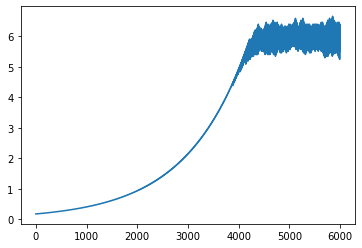

In [59]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(step_sizes)), step_sizes)
plt.show()
pass

In [60]:
epochs = 500

start_time = time.time()
for epoch in range(epochs):
    
    loss = 0.0
    acc = 0.0
    for bs, (x, y) in enumerate(train_ds):
        
        # only one mini-batch
        model.update_weights(x, network[bs], y, 0.1)
        
        network_new = []
        kernels_new = []
        for (xx, yy), net, hmc_kernel in zip(train_ds, network, kernels):
            net_current = net
            net_current = [tf.cast(net_i, dtype=tf.float32) for net_i in net_current]
            net_current = net_current[0]
        
            num_results = 1
            num_burnin_steps = 0

            samples = tfp.mcmc.sample_chain(
                num_results = num_results,
                num_burnin_steps = num_burnin_steps,
                current_state = net_current, # may need to be reshaped
                kernel = hmc_kernel,
                trace_fn = None,
                return_final_kernel_results = True)
            
            new_state = rerange(samples[0][0])
            net_new = tf.split(new_state, [50], axis = 1)   
            network_new.append(net_new)
            
            ker_new = model.generate_hmc_kernel(xx, yy, new_step_size)
            kernels_new.append(ker_new)
   
        network = network_new
        kernels = kernels_new
        
        loss += -1 * tf.reduce_mean(model.target_log_prob(x, network[bs], y))
    
    preds = [model.get_predictions(images) for images, labels in train_ds]
    train_acc = accuracy_score(np.concatenate(preds), y_train)
    print("Epoch %d/%d: - %.4fs/step - loss: %.4f - accuracy: %.4f" 
          % (epoch + 1, epochs, (time.time() - start_time) / (epoch + 1), loss, train_acc))

Epoch 1/500: - 3.1187s/step - loss: 416.9322 - accuracy: 0.8373
Epoch 2/500: - 3.1039s/step - loss: 415.5962 - accuracy: 0.8160
Epoch 3/500: - 3.0894s/step - loss: 413.8772 - accuracy: 0.7973
Epoch 4/500: - 3.1025s/step - loss: 411.1050 - accuracy: 0.7973
Epoch 5/500: - 3.0951s/step - loss: 409.7020 - accuracy: 0.7973
Epoch 6/500: - 3.0953s/step - loss: 407.3623 - accuracy: 0.7787
Epoch 7/500: - 3.0961s/step - loss: 402.7700 - accuracy: 0.7813
Epoch 8/500: - 3.0894s/step - loss: 400.5201 - accuracy: 0.7733
Epoch 9/500: - 3.0860s/step - loss: 398.1556 - accuracy: 0.7733
Epoch 10/500: - 3.0825s/step - loss: 395.4335 - accuracy: 0.7760
Epoch 11/500: - 3.0808s/step - loss: 391.9088 - accuracy: 0.7813
Epoch 12/500: - 3.0807s/step - loss: 390.5407 - accuracy: 0.7813
Epoch 13/500: - 3.0940s/step - loss: 387.9621 - accuracy: 0.7867
Epoch 14/500: - 3.1083s/step - loss: 383.9016 - accuracy: 0.7893
Epoch 15/500: - 3.1093s/step - loss: 379.2699 - accuracy: 0.7840
Epoch 16/500: - 3.1057s/step - los

Epoch 127/500: - 3.1182s/step - loss: 246.0291 - accuracy: 0.8773
Epoch 128/500: - 3.1178s/step - loss: 245.7946 - accuracy: 0.8800
Epoch 129/500: - 3.1173s/step - loss: 245.3055 - accuracy: 0.8827
Epoch 130/500: - 3.1172s/step - loss: 244.6002 - accuracy: 0.8827
Epoch 131/500: - 3.1168s/step - loss: 244.6570 - accuracy: 0.8827
Epoch 132/500: - 3.1167s/step - loss: 244.6883 - accuracy: 0.8827
Epoch 133/500: - 3.1161s/step - loss: 244.3852 - accuracy: 0.8827
Epoch 134/500: - 3.1158s/step - loss: 244.2287 - accuracy: 0.8827
Epoch 135/500: - 3.1153s/step - loss: 244.0344 - accuracy: 0.8827
Epoch 136/500: - 3.1149s/step - loss: 243.8990 - accuracy: 0.8800
Epoch 137/500: - 3.1151s/step - loss: 243.2112 - accuracy: 0.8800
Epoch 138/500: - 3.1145s/step - loss: 243.3106 - accuracy: 0.8827
Epoch 139/500: - 3.1146s/step - loss: 243.0124 - accuracy: 0.8800
Epoch 140/500: - 3.1144s/step - loss: 242.5219 - accuracy: 0.8800
Epoch 141/500: - 3.1141s/step - loss: 242.1079 - accuracy: 0.8827
Epoch 142/

Epoch 252/500: - 3.1961s/step - loss: 224.5951 - accuracy: 0.8933
Epoch 253/500: - 3.1967s/step - loss: 224.5614 - accuracy: 0.8907
Epoch 254/500: - 3.1991s/step - loss: 224.5434 - accuracy: 0.8907
Epoch 255/500: - 3.2003s/step - loss: 224.4852 - accuracy: 0.8907
Epoch 256/500: - 3.2011s/step - loss: 224.3522 - accuracy: 0.8907
Epoch 257/500: - 3.2018s/step - loss: 224.0289 - accuracy: 0.8907
Epoch 258/500: - 3.2033s/step - loss: 223.9843 - accuracy: 0.8933
Epoch 259/500: - 3.2040s/step - loss: 223.6815 - accuracy: 0.8933
Epoch 260/500: - 3.2055s/step - loss: 223.6633 - accuracy: 0.8933
Epoch 261/500: - 3.2054s/step - loss: 223.5157 - accuracy: 0.8933
Epoch 262/500: - 3.2052s/step - loss: 223.5092 - accuracy: 0.8933
Epoch 263/500: - 3.2048s/step - loss: 223.2523 - accuracy: 0.8907
Epoch 264/500: - 3.2076s/step - loss: 223.0829 - accuracy: 0.8933
Epoch 265/500: - 3.2106s/step - loss: 223.0752 - accuracy: 0.8907
Epoch 266/500: - 3.2114s/step - loss: 222.7790 - accuracy: 0.8907
Epoch 267/

Epoch 377/500: - 3.2078s/step - loss: 214.7458 - accuracy: 0.8853
Epoch 378/500: - 3.2078s/step - loss: 214.7708 - accuracy: 0.8853
Epoch 379/500: - 3.2088s/step - loss: 214.7614 - accuracy: 0.8853
Epoch 380/500: - 3.2104s/step - loss: 214.8068 - accuracy: 0.8853
Epoch 381/500: - 3.2115s/step - loss: 214.6853 - accuracy: 0.8853
Epoch 382/500: - 3.2120s/step - loss: 214.5705 - accuracy: 0.8853
Epoch 383/500: - 3.2119s/step - loss: 214.5167 - accuracy: 0.8853
Epoch 384/500: - 3.2116s/step - loss: 214.5541 - accuracy: 0.8853
Epoch 385/500: - 3.2114s/step - loss: 214.2707 - accuracy: 0.8853
Epoch 386/500: - 3.2110s/step - loss: 214.2586 - accuracy: 0.8880
Epoch 387/500: - 3.2106s/step - loss: 214.3089 - accuracy: 0.8907
Epoch 388/500: - 3.2102s/step - loss: 214.1520 - accuracy: 0.8907
Epoch 389/500: - 3.2098s/step - loss: 214.0766 - accuracy: 0.8907
Epoch 390/500: - 3.2094s/step - loss: 213.9639 - accuracy: 0.8907
Epoch 391/500: - 3.2090s/step - loss: 213.6264 - accuracy: 0.8907
Epoch 392/